<a href="https://colab.research.google.com/github/iciromaco/Semi3A/blob/master/L8/SIFT_SURF_on_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SURF, SIFT をサポートするライブラリの導入

SURF特徴とSIFT特徴は特許があるため、Google Colaboratory では封印されている。

営利目的での利用はもちろんだめだが、個人の研究目的で使用する場合は特許権からの制約に触れることはない。

Colabでインストール可能なOpenCVライブラリのうち、SURF,SIFTを含むと分かっているバージョンは、**3.4.2.17 ** であるので、これをインストールする。

なお、導入可能な opencv-contrib-python ライブラリのバージョンを確認するには、次のように、存在しないバージョンのインストールを試みればよい。



In [0]:
!pip install opencv-contrib-python==5
# あえてエラーとなるようにしているので ERROR と出て構わない

ERROR: Could not find a version that satisfies the requirement opencv-contrib-python==5 (from versions: 3.2.0.7, 3.2.0.8, 3.3.0.9, 3.3.0.10, 3.3.1.11, 3.4.0.12, 3.4.0.14, 3.4.1.15, 3.4.2.16, 3.4.2.17, 3.4.3.18, 3.4.4.19, 3.4.5.20, 3.4.6.27, 3.4.7.28, 3.4.8.29, 3.4.9.31, 3.4.9.33, 4.0.0.21, 4.0.1.23, 4.0.1.24, 4.1.0.25, 4.1.1.26, 4.1.2.30, 4.2.0.32, 4.2.0.34)
ERROR: No matching distribution found for opencv-contrib-python==5


In [0]:
#!pip install opencv-python==3.4.2.17
!pip install opencv-contrib-python==3.4.2.17

     |████████████████████████████████| 30.6MB 140kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


SURF:0.029666900634765625 sec
SIFT:0.03835248947143555 sec


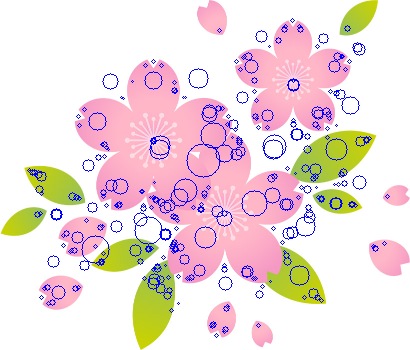

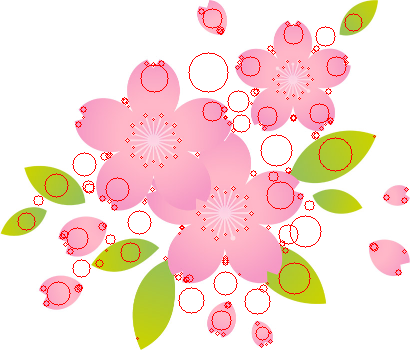

In [0]:
import cv2
import numpy as np
import time
import urllib.request
from google.colab.patches import cv2_imshow

url = "https://publicdomainq.net/images/201902/12s/publicdomainq-0031372xyf.jpg"
img_path,header=urllib.request.urlretrieve(url)
 
# 画像の読み込み
# filename = "prof.jpg"
srcimg = cv2.imread(img_path,1) # 1:color, 0:gray, -1:asis
srcimg = cv2.resize(srcimg,(srcimg.shape[1]//2,srcimg.shape[0]//2))
gryimg = cv2.cvtColor(srcimg, cv2.COLOR_BGR2GRAY)
 
# Detector の作成
surf = cv2.xfeatures2d.SURF_create()
sift = cv2.xfeatures2d.SIFT_create()
 
# 特徴検出
t0 = time.time()
surfkps = surf.detect(gryimg)
t1 = time.time()
print("SURF:{} sec".format(t1-t0))
siftkps = sift.detect(gryimg)
t2 = time.time()
print("SIFT:{} sec".format(t2-t1))
 
# 特徴点の描画
srcimg_surf=srcimg.copy()
srcimg_sift=srcimg.copy()

for ip in surfkps:
  pt = (np.round(ip.pt[0]).astype(int),np.round(ip.pt[1]).astype(int))
  rd = np.round(ip.size*0.1).astype(int)
  cv2.circle(srcimg_surf,pt,rd,(255,0,0),1,8,0)
for ip in siftkps:
  pt = (np.round(ip.pt[0]).astype(int),np.round(ip.pt[1]).astype(int))
  rd = np.round(ip.size*0.5).astype(int)
  cv2.circle(srcimg_sift,pt,rd,(0,0,255),1,8,0)

''' TOP100のみ表示
sizevsurf = np.array([ip.size for ip in surfkps])
sizevsift = np.array([ip.size for ip in siftkps])
top100surf = np.argsort(sizevsurf)[-100:]
top100sift = np.argsort(sizevsift)[-100:]
for index in top100surf:
  ip = surfkps[index]
  pt = (np.round(ip.pt[0]).astype(int),np.round(ip.pt[1]).astype(int))
  rd = np.round(ip.size*0.25).astype(int)
  cv2.circle(srcimg_surf,pt,rd,(255,0,0),1,8,0)
for index in top100sift:
  print(index)
  ip = siftkps[index]
  pt = (np.round(ip.pt[0]).astype(int),np.round(ip.pt[1]).astype(int))
  rd = np.round(ip.size*0.5).astype(int)
  cv2.circle(srcimg_sift,pt,rd,(0,0,255),1,8,0)'''
 
cv2_imshow(srcimg_surf)
cv2_imshow(srcimg_sift)
